(1460, 79)
(1459, 79)


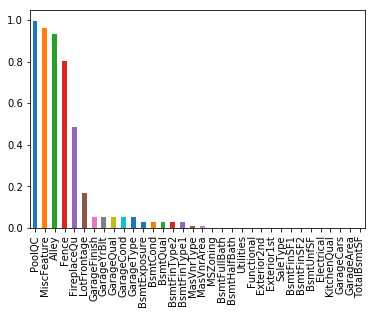

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv("train.csv", index_col="Id")
train = train.drop(["SalePrice"], axis =1)
print(train.shape)

test=pd.read_csv("test.csv", index_col="Id")
print(test.shape)

train_test = pd.concat([train, test], axis=0, sort=False)
train_test.shape

#missing value counter
def na_counter(data):
    coln = list(data.columns)
    df_na ={}
    for col in coln:
        if data[col].isnull().any()==True:
            na_value = data[col].isnull().sum()
            na_percent = data[col].isnull().sum()/len(data)
            df_na[col]=[na_value, na_percent]
    df_Na =pd.DataFrame(df_na).T
    df_Na.columns = ['NA',"PERCENT"]
    return df_Na

na_df = na_counter(train_test)

na_df["PERCENT"].sort_values(ascending = False).plot.bar()

### Imputation 

#### 1. Simply "None"

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
       
#### 2. Information from other columns

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [3]:
test.loc[test["MSZoning"].isnull(),['Neighborhood']]

,Neighborhood
Id,
1916,IDOTRR
2217,IDOTRR
2251,IDOTRR
2905,Mitchel


In [6]:
test.loc[test['Neighborhood']=="IDOTRR", "MSZoning"].value_counts()

RM         40
C (all)    13
Name: MSZoning, dtype: int64

In [5]:
train_test["MSZoning"] = train_test["MSZoning"].fillna("RM")

#### 3 . set to average values based on Overall Quality

In [9]:
train_test.loc[(train_test.GarageArea==360) & train_test.GarageCond.isnull(), "GarageCond"] = "TA"